<a href="https://colab.research.google.com/github/V3G404/HIGI2022/blob/main/%5Cproyecto%20final%5Cproyecto_final_HIGI22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install pandas-ods-reader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 6.9 MB/s 
  Created wheel for ezodf: filename=ezodf-0.3.2-py2.py3-none-any.whl size=49002 sha256=b4fa7a6990ca4deaceb8a71bd1634cbdb1dfe2a5fca94bc1e421ad6873fe2aeb
  Stored in directory: /root/.cache/pip/wheels/50/d3/91/67b352fa0847576d7f3716a1d9a8ded88abb49e6c972cec44a
Successfully built ezodf


In [2]:

import matplotlib.pyplot as plt
import numpy as np
import os
from urllib import request
import math as math
import requests
from pandas_ods_reader import read_ods
from scipy import stats
from scipy.optimize import minimize



In [3]:
import pandas as pd

In [4]:
pokemon0 = pd.read_csv('/content/sample_data/pokemon0.csv', encoding='latin-1')

In [5]:
pokemon0

,national number,gen,name,primary_type,secondary_type,percent_male,percent_female,height_m,weight_kg,capture_rate,...,is_sublegendary_0,is_sublegendary,is_legendary_0,is_legendary,is_mythical_0,is_mythical,mega_0,mega_1,mega_evolution,mega_evolution_alt
0,1,I,Bulbasaur,grass,poison,88.14,11.86,0.7,6.9,45,...,NO,0,NO,0,NO,0,NO,NaN,NaN,NaN
1,2,I,Ivysaur,grass,poison,88.14,11.86,1.0,13.0,45,...,NO,0,NO,0,NO,0,NO,NaN,NaN,NaN
2,3,I,Venusaur,grass,poison,88.14,11.86,2.0,100.0,45,...,NO,0,NO,0,NO,0,YES,Mega,Mega Venusaur,NaN
3,4,I,Charmander,fire,NaN,88.14,11.86,0.6,8.5,45,...,NO,0,NO,0,NO,0,NO,NaN,NaN,NaN
4,5,I,Charmeleon,fire,NaN,88.14,11.86,1.1,19.0,45,...,NO,0,NO,0,NO,0,NO,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,894,VIII,Regieleki,electric,NaN,NaN,NaN,1.2,145.0,3,...,YES,1,NO,0,NO,0,NO,NaN,NaN,NaN
894,895,VIII,Regidrago,dragon,NaN,NaN,NaN,2.1,200.0,3,...,YES,1,NO,0,NO,0,NO,NaN,NaN,NaN
895,896,VIII,Glastrier,ice,NaN,NaN,NaN,2.2,800.0,3,...,YES,1,NO,0,NO,0,NO,NaN,NaN,NaN
896,897,VIII,Spectrier,ghost,NaN,NaN,NaN,2.0,44.5,3,...,NO,0,NO,0,NO,0,NO,NaN,NaN,NaN


In [6]:
pokemonpi = pokemon0.sample(10)
pokemonpi

,national number,gen,name,primary_type,secondary_type,percent_male,percent_female,height_m,weight_kg,capture_rate,...,is_sublegendary_0,is_sublegendary,is_legendary_0,is_legendary,is_mythical_0,is_mythical,mega_0,mega_1,mega_evolution,mega_evolution_alt
698,699,VI,Aurorus,rock,ice,88.14,11.86,2.7,225.0,45,...,NO,0,NO,0,NO,0,NO,NaN,NaN,NaN
732,733,VII,Toucannon,normal,flying,50,50,1.1,26.0,45,...,NO,0,NO,0,NO,0,NO,NaN,NaN,NaN
189,190,II,Aipom,normal,NaN,50,50,0.8,11.5,45,...,NO,0,NO,0,NO,0,NO,NaN,NaN,NaN
21,22,I,Fearow,normal,flying,50,50,1.2,38.0,90,...,NO,0,NO,0,NO,0,NO,NaN,NaN,NaN
81,82,I,Magneton,electric,steel,NaN,NaN,1.0,60.0,60,...,NO,0,NO,0,NO,0,NO,NaN,NaN,NaN
888,889,VIII,Zamazenta,fighting,fighting,NaN,NaN,2.9,210.0,10,...,NO,0,NO,0,NO,0,NO,NaN,NaN,NaN
382,383,III,Groudon,ground,NaN,NaN,NaN,3.5,950.0,3,...,NO,0,YES,1,NO,0,NO,NaN,NaN,NaN
77,78,I,Rapidash,fire,psychic,50.2,49.8,1.7,95.0,60,...,NO,0,NO,0,NO,0,NO,NaN,NaN,NaN
13,14,I,Kakuna,bug,poison,50,50,0.6,10.0,120,...,NO,0,NO,0,NO,0,NO,NaN,NaN,NaN
194,195,II,Quagsire,water,ground,50.2,49.8,1.4,75.0,90,...,NO,0,NO,0,NO,0,NO,NaN,NaN,NaN


In [7]:
pokemonpi.keys()

Index(['national number', 'gen', 'name', 'primary_type', 'secondary_type',
       'percent_male', 'percent_female', 'height_m', 'weight_kg',
       'capture_rate', 'base_egg_steps', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'abilities_0', 'abilities_hidden',
       'against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fighting', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy', 'is_sublegendary_0',
       'is_sublegendary', 'is_legendary_0', 'is_legendary', 'is_mythical_0',
       'is_mythical', 'mega_0', 'mega_1', 'mega_evolution',
       'mega_evolution_alt'],
      dtype='object')

In [8]:
pokemonpi2 = pokemonpi[["gen","name","height_m","weight_kg","capture_rate","is_legendary_0"]]
pokemonpi2

,gen,name,height_m,weight_kg,capture_rate,is_legendary_0
698,VI,Aurorus,2.7,225.0,45,NO
732,VII,Toucannon,1.1,26.0,45,NO
189,II,Aipom,0.8,11.5,45,NO
21,I,Fearow,1.2,38.0,90,NO
81,I,Magneton,1.0,60.0,60,NO
888,VIII,Zamazenta,2.9,210.0,10,NO
382,III,Groudon,3.5,950.0,3,YES
77,I,Rapidash,1.7,95.0,60,NO
13,I,Kakuna,0.6,10.0,120,NO
194,II,Quagsire,1.4,75.0,90,NO


In [ ]:
pokemonpi2 = pokemonpi[["gen","name","height_m","weight_kg","capture_rate","is_legendary_0"]]
pokemonpi2

In [9]:
print(pokemonpi2.style.to_latex())

\begin{tabular}{lllrrll}
{} & {gen} & {name} & {height_m} & {weight_kg} & {capture_rate} & {is_legendary_0} \\
698 & VI & Aurorus & 2.700000 & 225.000000 & 45 & NO \\
732 & VII & Toucannon & 1.100000 & 26.000000 & 45 & NO \\
189 & II & Aipom & 0.800000 & 11.500000 & 45 & NO \\
21 & I & Fearow & 1.200000 & 38.000000 & 90 & NO \\
81 & I & Magneton & 1.000000 & 60.000000 & 60 & NO \\
888 & VIII & Zamazenta & 2.900000 & 210.000000 & 10 & NO \\
382 & III & Groudon & 3.500000 & 950.000000 & 3 & YES \\
77 & I & Rapidash & 1.700000 & 95.000000 & 60 & NO \\
13 & I & Kakuna & 0.600000 & 10.000000 & 120 & NO \\
194 & II & Quagsire & 1.400000 & 75.000000 & 90 & NO \\
\end{tabular}



In [10]:
print(pokemonpi2.to_latex(index=True))

\begin{tabular}{lllrrll}
\toprule
{} &   gen &       name &  height\_m &  weight\_kg & capture\_rate & is\_legendary\_0 \\
\midrule
698 &    VI &    Aurorus &       2.7 &      225.0 &           45 &             NO \\
732 &   VII &  Toucannon &       1.1 &       26.0 &           45 &             NO \\
189 &    II &      Aipom &       0.8 &       11.5 &           45 &             NO \\
21  &     I &     Fearow &       1.2 &       38.0 &           90 &             NO \\
81  &     I &   Magneton &       1.0 &       60.0 &           60 &             NO \\
888 &  VIII &  Zamazenta &       2.9 &      210.0 &           10 &             NO \\
382 &   III &    Groudon &       3.5 &      950.0 &            3 &            YES \\
77  &     I &   Rapidash &       1.7 &       95.0 &           60 &             NO \\
13  &     I &     Kakuna &       0.6 &       10.0 &          120 &             NO \\
194 &    II &   Quagsire &       1.4 &       75.0 &           90 &             NO \\
\bottomrule
\end{t

In [11]:
pokemon0.describe()

,national number,height_m,weight_kg,base_egg_steps,hp,attack,defense,sp_attack,sp_defense,speed,...,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,is_sublegendary,is_legendary,is_mythical
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.00000,898.000000,898.000000,898.000000
mean,449.500000,1.185969,63.970045,7544.587973,69.031180,76.544543,71.886414,69.681514,69.876392,65.949889,...,0.999165,1.245546,0.994432,0.972717,1.057628,0.984131,1.08157,0.050111,0.022272,0.022272
std,259.374568,1.234222,119.430298,7101.313608,26.213707,29.665559,29.536184,29.372609,27.012142,28.456596,...,0.609120,0.702248,0.553163,0.365120,0.441639,0.497022,0.53157,0.218296,0.147648,0.147648
min,1.000000,0.100000,0.100000,1280.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,...,0.250000,0.250000,0.000000,0.000000,0.250000,0.250000,0.25000,0.000000,0.000000,0.000000
25%,225.250000,0.500000,8.500000,5120.000000,50.000000,55.000000,50.000000,46.250000,50.000000,45.000000,...,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.00000,0.000000,0.000000,0.000000
50%,449.500000,1.000000,27.000000,5120.000000,65.000000,75.000000,67.000000,65.000000,65.000000,65.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000
75%,673.750000,1.500000,65.000000,6400.000000,80.000000,95.000000,90.000000,90.000000,85.000000,85.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000
max,898.000000,20.000000,999.900000,30720.000000,255.000000,181.000000,230.000000,173.000000,230.000000,200.000000,...,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.00000,1.000000,1.000000,1.000000


In [12]:
pokemon0.keys()

Index(['national number', 'gen', 'name', 'primary_type', 'secondary_type',
       'percent_male', 'percent_female', 'height_m', 'weight_kg',
       'capture_rate', 'base_egg_steps', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'abilities_0', 'abilities_hidden',
       'against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fighting', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy', 'is_sublegendary_0',
       'is_sublegendary', 'is_legendary_0', 'is_legendary', 'is_mythical_0',
       'is_mythical', 'mega_0', 'mega_1', 'mega_evolution',
       'mega_evolution_alt'],
      dtype='object')

In [13]:
pokemon0[pokemon0['is_legendary_0']=="YES"]

,national number,gen,name,primary_type,secondary_type,percent_male,percent_female,height_m,weight_kg,capture_rate,...,is_sublegendary_0,is_sublegendary,is_legendary_0,is_legendary,is_mythical_0,is_mythical,mega_0,mega_1,mega_evolution,mega_evolution_alt
149,150,I,Mewtwo,psychic,NaN,NaN,NaN,2.0,122.0,3,...,NO,0,YES,1,NO,0,YES,Mega,Mega Mewtwo X,Mega Mewtwo Y
248,249,II,Lugia,psychic,flying,NaN,NaN,5.2,216.0,3,...,NO,0,YES,1,NO,0,NO,NaN,NaN,NaN
249,250,II,Ho-Oh,fire,flying,NaN,NaN,3.8,199.0,3,...,NO,0,YES,1,NO,0,NO,NaN,NaN,NaN
381,382,III,Kyogre,water,NaN,NaN,NaN,4.5,352.0,3,...,NO,0,YES,1,NO,0,NO,NaN,NaN,NaN
382,383,III,Groudon,ground,NaN,NaN,NaN,3.5,950.0,3,...,NO,0,YES,1,NO,0,NO,NaN,NaN,NaN
383,384,III,Rayquaza,dragon,flying,NaN,NaN,7.0,206.5,45,...,NO,0,YES,1,NO,0,YES,Mega,Mega Rayquaza,NaN
482,483,IV,Dialga,steel,dragon,NaN,NaN,5.4,683.0,3,...,NO,0,YES,1,NO,0,NO,NaN,NaN,NaN
483,484,IV,Palkia,water,dragon,NaN,NaN,4.2,336.0,3,...,NO,0,YES,1,NO,0,NO,NaN,NaN,NaN
486,487,IV,Giratina,ghost,dragon,NaN,NaN,4.5,750.0,3,...,NO,0,YES,1,NO,0,NO,NaN,NaN,NaN
642,643,V,Reshiram,dragon,fire,NaN,NaN,3.2,330.0,3,...,NO,0,YES,1,NO,0,NO,NaN,NaN,NaN


In [14]:
pokemon0.keys()

Index(['national number', 'gen', 'name', 'primary_type', 'secondary_type',
       'percent_male', 'percent_female', 'height_m', 'weight_kg',
       'capture_rate', 'base_egg_steps', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'abilities_0', 'abilities_hidden',
       'against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fighting', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy', 'is_sublegendary_0',
       'is_sublegendary', 'is_legendary_0', 'is_legendary', 'is_mythical_0',
       'is_mythical', 'mega_0', 'mega_1', 'mega_evolution',
       'mega_evolution_alt'],
      dtype='object')

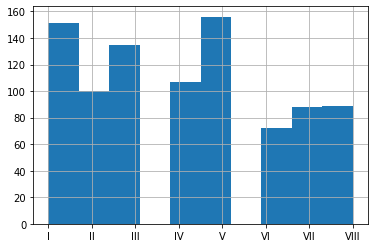

In [15]:
pokemon0['gen'].hist()

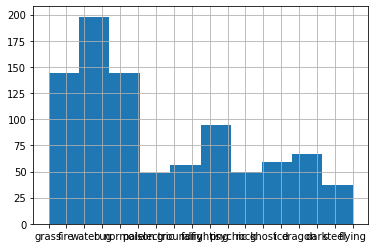

In [16]:
pokemon0['primary_type'].hist()

In [17]:
pokemonI=pokemon0[pokemon0["primary_type"]=="dragon"]
pokemonI


,national number,gen,name,primary_type,secondary_type,percent_male,percent_female,height_m,weight_kg,capture_rate,...,is_sublegendary_0,is_sublegendary,is_legendary_0,is_legendary,is_mythical_0,is_mythical,mega_0,mega_1,mega_evolution,mega_evolution_alt
146,147,I,Dratini,dragon,NaN,50.2,49.8,1.8,3.3,45,...,NO,0,NO,0,NO,0,NO,NaN,NaN,NaN
147,148,I,Dragonair,dragon,NaN,50.2,49.8,4.0,16.5,45,...,NO,0,NO,0,NO,0,NO,NaN,NaN,NaN
148,149,I,Dragonite,dragon,flying,50.2,49.8,2.2,210.0,45,...,NO,0,NO,0,NO,0,NO,NaN,NaN,NaN
333,334,III,Altaria,dragon,flying,50.2,49.8,1.1,20.6,45,...,NO,0,NO,0,NO,0,YES,Mega,Mega Altaria,NaN
370,371,III,Bagon,dragon,NaN,50.2,49.8,0.6,42.1,45,...,NO,0,NO,0,NO,0,NO,NaN,NaN,NaN
371,372,III,Shelgon,dragon,NaN,50.2,49.8,1.1,110.5,45,...,NO,0,NO,0,NO,0,NO,NaN,NaN,NaN
372,373,III,Salamence,dragon,flying,50.2,49.8,1.5,102.6,45,...,NO,0,NO,0,NO,0,YES,Mega,Mega Salamence,NaN
379,380,III,Latias,dragon,psychic,0,100,1.4,40.0,3,...,YES,1,NO,0,NO,0,YES,Mega,Mega Latias,NaN
380,381,III,Latios,dragon,psychic,100,0,2.0,60.0,3,...,YES,1,NO,0,NO,0,YES,Mega,Mega Latios,NaN
383,384,III,Rayquaza,dragon,flying,NaN,NaN,7.0,206.5,45,...,NO,0,YES,1,NO,0,YES,Mega,Mega Rayquaza,NaN


In [40]:
pokemonIgen=pokemon0[pokemon0["gen"]=="I"]	
pokemonIgen=

,national number,gen,name,primary_type,secondary_type,percent_male,percent_female,height_m,weight_kg,capture_rate,...,is_sublegendary_0,is_sublegendary,is_legendary_0,is_legendary,is_mythical_0,is_mythical,mega_0,mega_1,mega_evolution,mega_evolution_alt
0,1,I,Bulbasaur,grass,poison,88.14,11.86,0.7,6.9,45,...,NO,0,NO,0,NO,0,NO,NaN,NaN,NaN
1,2,I,Ivysaur,grass,poison,88.14,11.86,1.0,13.0,45,...,NO,0,NO,0,NO,0,NO,NaN,NaN,NaN
2,3,I,Venusaur,grass,poison,88.14,11.86,2.0,100.0,45,...,NO,0,NO,0,NO,0,YES,Mega,Mega Venusaur,NaN
3,4,I,Charmander,fire,NaN,88.14,11.86,0.6,8.5,45,...,NO,0,NO,0,NO,0,NO,NaN,NaN,NaN
4,5,I,Charmeleon,fire,NaN,88.14,11.86,1.1,19.0,45,...,NO,0,NO,0,NO,0,NO,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,I,Dratini,dragon,NaN,50.2,49.8,1.8,3.3,45,...,NO,0,NO,0,NO,0,NO,NaN,NaN,NaN
147,148,I,Dragonair,dragon,NaN,50.2,49.8,4.0,16.5,45,...,NO,0,NO,0,NO,0,NO,NaN,NaN,NaN
148,149,I,Dragonite,dragon,flying,50.2,49.8,2.2,210.0,45,...,NO,0,NO,0,NO,0,NO,NaN,NaN,NaN
149,150,I,Mewtwo,psychic,NaN,NaN,NaN,2.0,122.0,3,...,NO,0,YES,1,NO,0,YES,Mega,Mega Mewtwo X,Mega Mewtwo Y


In [19]:
pokemonI=pokemon0[pokemon0["primary_type"]=="dragon"]
pokemonIIgen=pokemonI[pokemonI["gen"]=="II"]	
pokemonIIgen

,national number,gen,name,primary_type,secondary_type,percent_male,percent_female,height_m,weight_kg,capture_rate,...,is_sublegendary_0,is_sublegendary,is_legendary_0,is_legendary,is_mythical_0,is_mythical,mega_0,mega_1,mega_evolution,mega_evolution_alt


In [20]:
pokemonI=pokemon0[pokemon0["primary_type"]=="dragon"]
pokemonIIIgen=pokemonI[pokemonI["gen"]=="III"]	
pokemonIIIgen

,national number,gen,name,primary_type,secondary_type,percent_male,percent_female,height_m,weight_kg,capture_rate,...,is_sublegendary_0,is_sublegendary,is_legendary_0,is_legendary,is_mythical_0,is_mythical,mega_0,mega_1,mega_evolution,mega_evolution_alt
333,334,III,Altaria,dragon,flying,50.2,49.8,1.1,20.6,45,...,NO,0,NO,0,NO,0,YES,Mega,Mega Altaria,NaN
370,371,III,Bagon,dragon,NaN,50.2,49.8,0.6,42.1,45,...,NO,0,NO,0,NO,0,NO,NaN,NaN,NaN
371,372,III,Shelgon,dragon,NaN,50.2,49.8,1.1,110.5,45,...,NO,0,NO,0,NO,0,NO,NaN,NaN,NaN
372,373,III,Salamence,dragon,flying,50.2,49.8,1.5,102.6,45,...,NO,0,NO,0,NO,0,YES,Mega,Mega Salamence,NaN
379,380,III,Latias,dragon,psychic,0,100,1.4,40.0,3,...,YES,1,NO,0,NO,0,YES,Mega,Mega Latias,NaN
380,381,III,Latios,dragon,psychic,100,0,2.0,60.0,3,...,YES,1,NO,0,NO,0,YES,Mega,Mega Latios,NaN
383,384,III,Rayquaza,dragon,flying,NaN,NaN,7.0,206.5,45,...,NO,0,YES,1,NO,0,YES,Mega,Mega Rayquaza,NaN


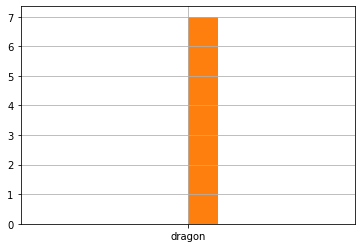

In [21]:
pokemonIgen['primary_type'].hist()
pokemonIIIgen['primary_type'].hist()

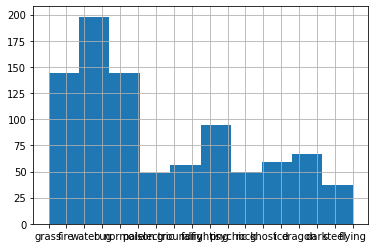

In [22]:
pokemon0['primary_type'].hist()

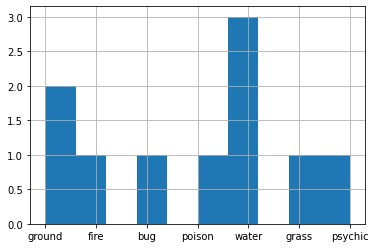

In [62]:
pokemoni['primary_type'].hist()

# Pokémon de la primera generación


In [44]:
pokemoni=pokemon0[pokemon0['gen']=="I"]
pokemoni
pokemoni = pokemoni[["gen","name", "primary_type", "secondary_type","height_m","weight_kg","capture_rate"]]
pokemoni

,gen,name,primary_type,secondary_type,height_m,weight_kg,capture_rate
0,I,Bulbasaur,grass,poison,0.7,6.9,45
1,I,Ivysaur,grass,poison,1.0,13.0,45
2,I,Venusaur,grass,poison,2.0,100.0,45
3,I,Charmander,fire,NaN,0.6,8.5,45
4,I,Charmeleon,fire,NaN,1.1,19.0,45
...,...,...,...,...,...,...,...
146,I,Dratini,dragon,NaN,1.8,3.3,45
147,I,Dragonair,dragon,NaN,4.0,16.5,45
148,I,Dragonite,dragon,flying,2.2,210.0,45
149,I,Mewtwo,psychic,NaN,2.0,122.0,3


In [50]:
pokemonistats=pokemon0[pokemon0['gen']=="I"]
pokemonistats=pokemonistats[["gen","name","hp","attack","defense","sp_attack","sp_defense","speed"]]
pokemonistats

,gen,name,hp,attack,defense,sp_attack,sp_defense,speed
0,I,Bulbasaur,45,49,49,65,65,45
1,I,Ivysaur,60,62,63,80,80,60
2,I,Venusaur,80,82,83,100,100,80
3,I,Charmander,39,52,43,60,50,65
4,I,Charmeleon,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...
146,I,Dratini,41,64,45,50,50,50
147,I,Dragonair,61,84,65,70,70,70
148,I,Dragonite,91,134,95,100,100,80
149,I,Mewtwo,106,110,90,154,90,130


In [73]:
pokemonii=pokemon0[pokemon0['gen']=="II"]
pokemonii
pokemonii = pokemonii[["gen","name", "primary_type", "secondary_type","height_m","weight_kg","capture_rate"]]
pokemonii0 = pokemonii.sample(5)
pokemonii0

,gen,name,primary_type,secondary_type,height_m,weight_kg,capture_rate
218,II,Magcargo,fire,rock,0.8,55.0,75
235,II,Tyrogue,fighting,NaN,0.7,21.0,75
246,II,Pupitar,rock,ground,1.2,152.0,45
243,II,Entei,fire,NaN,2.1,198.0,3
166,II,Spinarak,bug,poison,0.5,8.5,255


In [74]:
print(pokemonii0.to_latex(index=True))

\begin{tabular}{lllllrrl}
\toprule
{} & gen &      name & primary\_type & secondary\_type &  height\_m &  weight\_kg & capture\_rate \\
\midrule
218 &  II &  Magcargo &         fire &           rock &       0.8 &       55.0 &           75 \\
235 &  II &   Tyrogue &     fighting &            NaN &       0.7 &       21.0 &           75 \\
246 &  II &   Pupitar &         rock &         ground &       1.2 &      152.0 &           45 \\
243 &  II &     Entei &         fire &            NaN &       2.1 &      198.0 &            3 \\
166 &  II &  Spinarak &          bug &         poison &       0.5 &        8.5 &          255 \\
\bottomrule
\end{tabular}



In [75]:
pokemoniistats=pokemon0[pokemon0['gen']=="II"]
pokemoniistats=pokemoniistats[["gen","name","hp","attack","defense","sp_attack","sp_defense","speed"]]
pokemoniistats0=pokemoniistats.sample(5)
pokemoniistats0

,gen,name,hp,attack,defense,sp_attack,sp_defense,speed
196,II,Umbreon,95,65,110,60,130,65
232,II,Porygon2,85,80,90,105,95,60
153,II,Meganium,80,82,100,83,100,80
178,II,Mareep,55,40,40,65,45,35
189,II,Aipom,55,70,55,40,55,85


In [76]:
print(pokemoniistats0.to_latex(index=True))

\begin{tabular}{lllrrrrrr}
\toprule
{} & gen &      name &  hp &  attack &  defense &  sp\_attack &  sp\_defense &  speed \\
\midrule
196 &  II &   Umbreon &  95 &      65 &      110 &         60 &         130 &     65 \\
232 &  II &  Porygon2 &  85 &      80 &       90 &        105 &          95 &     60 \\
153 &  II &  Meganium &  80 &      82 &      100 &         83 &         100 &     80 \\
178 &  II &    Mareep &  55 &      40 &       40 &         65 &          45 &     35 \\
189 &  II &     Aipom &  55 &      70 &       55 &         40 &          55 &     85 \\
\bottomrule
\end{tabular}



In [71]:
pokemonstats=pokemon0[["gen","name","hp","attack","defense","sp_attack","sp_defense","speed"]]
pokemonstats=pokemonstats.sample(5)
pokemonstats

,gen,name,hp,attack,defense,sp_attack,sp_defense,speed
547,V,Petilil,45,35,50,70,50,30
808,VII,Melmetal,135,143,143,80,65,34
564,V,Carracosta,74,108,133,83,65,32
167,II,Ariados,70,90,70,60,70,40
118,I,Seaking,80,92,65,65,80,68


# Tercera generación

In [77]:
pokemoniii=pokemon0[pokemon0['gen']=="III"]
pokemoniii
pokemoniii = pokemoniii[["gen","name", "primary_type","height_m","weight_kg","capture_rate"]]

#Nombramos pokemoniii más un 0 debido a que estás funciones serán utilizadas para el histograma de tipos :)

pokemoniii0 = pokemoniii.sample(5)
pokemoniii0

,gen,name,primary_type,height_m,weight_kg,capture_rate
283,III,Masquerain,bug,0.8,3.6,75
269,III,Lotad,water,0.5,2.6,255
364,III,Walrein,ice,1.4,150.6,45
377,III,Regice,ice,1.8,175.0,3
280,III,Kirlia,psychic,0.8,20.2,120


In [81]:
print(pokemoniii0.to_latex(index=True))

\begin{tabular}{llllrrl}
\toprule
{} &  gen &        name & primary\_type &  height\_m &  weight\_kg & capture\_rate \\
\midrule
283 &  III &  Masquerain &          bug &       0.8 &        3.6 &           75 \\
269 &  III &       Lotad &        water &       0.5 &        2.6 &          255 \\
364 &  III &     Walrein &          ice &       1.4 &      150.6 &           45 \\
377 &  III &      Regice &          ice &       1.8 &      175.0 &            3 \\
280 &  III &      Kirlia &      psychic &       0.8 &       20.2 &          120 \\
\bottomrule
\end{tabular}



In [84]:
pokemoniiistats=pokemon0[pokemon0['gen']=="III"]
pokemoniiistats=pokemoniiistats[["gen","name","hp","attack","defense","sp_attack","sp_defense","speed"]]
pokemoniiistats0=pokemoniiistats.sample(5)
pokemoniiistats0


,gen,name,hp,attack,defense,sp_attack,sp_defense,speed
311,III,Minun,60,40,50,75,85,95
349,III,Milotic,95,60,79,100,125,81
308,III,Electrike,40,45,40,65,40,65
348,III,Feebas,20,15,20,10,55,80
255,III,Combusken,60,85,60,85,60,55


In [85]:
print(pokemoniiistats0.to_latex(index=True))

\begin{tabular}{lllrrrrrr}
\toprule
{} &  gen &       name &  hp &  attack &  defense &  sp\_attack &  sp\_defense &  speed \\
\midrule
311 &  III &      Minun &  60 &      40 &       50 &         75 &          85 &     95 \\
349 &  III &    Milotic &  95 &      60 &       79 &        100 &         125 &     81 \\
308 &  III &  Electrike &  40 &      45 &       40 &         65 &          40 &     65 \\
348 &  III &     Feebas &  20 &      15 &       20 &         10 &          55 &     80 \\
255 &  III &  Combusken &  60 &      85 &       60 &         85 &          60 &     55 \\
\bottomrule
\end{tabular}



# Nueva sección Cuarta generación

In [97]:
pokemoniv=pokemon0[pokemon0['gen']=="IV"]
pokemoniv
pokemoniv = pokemoniv[["gen","name", "primary_type","height_m","weight_kg","capture_rate"]]

#Nombramos pokemoniii más un 0 debido a que estás funciones serán utilizadas para el histograma de tipos :)

pokemoniv0 = pokemoniv.sample(5)
pokemoniv0

,gen,name,primary_type,height_m,weight_kg,capture_rate
478,IV,Rotom,electric,0.3,0.3,45
386,IV,Turtwig,grass,0.4,10.2,45
445,IV,Munchlax,normal,0.6,105.0,50
407,IV,Cranidos,rock,0.9,31.5,45
473,IV,Porygon-Z,normal,0.9,34.0,30


In [89]:
print(pokemoniv0.to_latex(index=True))

\begin{tabular}{llllrrl}
\toprule
{} & gen &       name & primary\_type &  height\_m &  weight\_kg & capture\_rate \\
\midrule
457 &  IV &    Mantyke &        water &       1.0 &       65.0 &           25 \\
410 &  IV &  Bastiodon &         rock &       1.3 &      149.5 &           45 \\
458 &  IV &     Snover &        grass &       1.0 &       50.5 &          120 \\
388 &  IV &   Torterra &        grass &       2.2 &      310.0 &           45 \\
424 &  IV &   Drifloon &        ghost &       0.4 &        1.2 &          125 \\
\bottomrule
\end{tabular}



In [95]:
pokemonivstats=pokemon0[pokemon0['gen']=="IV"]
pokemonivstats=pokemonivstats[["gen","name","hp","attack","defense","sp_attack","sp_defense","speed"]]
pokemonivstats0=pokemonivstats.sample(5)
pokemonivstats0


,gen,name,hp,attack,defense,sp_attack,sp_defense,speed
425,IV,Drifblim,150,80,44,90,54,80
389,IV,Chimchar,44,58,44,58,44,61
417,IV,Buizel,55,65,35,60,30,85
431,IV,Purugly,71,82,64,64,59,112
482,IV,Dialga,100,120,120,150,100,90


In [96]:
print(pokemonivstats0.to_latex(index=True))

\begin{tabular}{lllrrrrrr}
\toprule
{} & gen &      name &   hp &  attack &  defense &  sp\_attack &  sp\_defense &  speed \\
\midrule
425 &  IV &  Drifblim &  150 &      80 &       44 &         90 &          54 &     80 \\
389 &  IV &  Chimchar &   44 &      58 &       44 &         58 &          44 &     61 \\
417 &  IV &    Buizel &   55 &      65 &       35 &         60 &          30 &     85 \\
431 &  IV &   Purugly &   71 &      82 &       64 &         64 &          59 &    112 \\
482 &  IV &    Dialga &  100 &     120 &      120 &        150 &         100 &     90 \\
\bottomrule
\end{tabular}



# [Quinta generación

In [98]:
pokemonv=pokemon0[pokemon0['gen']=="V"]
pokemonv
pokemonv = pokemonv[["gen","name", "primary_type","height_m","weight_kg","capture_rate"]]

#Nombramos pokemoniii más un 0 debido a que estás funciones serán utilizadas para el histograma de tipos :)

pokemonv0 = pokemonv.sample(5)
pokemonv0

,gen,name,primary_type,height_m,weight_kg,capture_rate
536,V,Seismitoad,water,1.5,62.0,45
602,V,Eelektrik,electric,1.2,22.0,60
564,V,Carracosta,water,1.2,81.0,45
576,V,Solosis,psychic,0.3,1.0,200
630,V,Heatmor,fire,1.4,58.0,90


In [99]:
print(pokemonv0.to_latex(index=True))

\begin{tabular}{llllrrl}
\toprule
{} & gen &        name & primary\_type &  height\_m &  weight\_kg & capture\_rate \\
\midrule
536 &   V &  Seismitoad &        water &       1.5 &       62.0 &           45 \\
602 &   V &   Eelektrik &     electric &       1.2 &       22.0 &           60 \\
564 &   V &  Carracosta &        water &       1.2 &       81.0 &           45 \\
576 &   V &     Solosis &      psychic &       0.3 &        1.0 &          200 \\
630 &   V &     Heatmor &         fire &       1.4 &       58.0 &           90 \\
\bottomrule
\end{tabular}



In [100]:
pokemonvstats=pokemon0[pokemon0['gen']=="V"]
pokemonvstats=pokemonvstats[["gen","name","hp","attack","defense","sp_attack","sp_defense","speed"]]
pokemonvstats0=pokemonvstats.sample(5)
pokemonvstats0


,gen,name,hp,attack,defense,sp_attack,sp_defense,speed
644,V,Landorus,89,125,90,115,80,101
561,V,Yamask,38,30,85,55,65,30
598,V,Klink,40,55,70,45,60,30
538,V,Sawk,75,125,75,30,75,85
521,V,Blitzle,45,60,32,50,32,76


In [101]:
print(pokemonvstats0.to_latex(index=True))

\begin{tabular}{lllrrrrrr}
\toprule
{} & gen &      name &  hp &  attack &  defense &  sp\_attack &  sp\_defense &  speed \\
\midrule
644 &   V &  Landorus &  89 &     125 &       90 &        115 &          80 &    101 \\
561 &   V &    Yamask &  38 &      30 &       85 &         55 &          65 &     30 \\
598 &   V &     Klink &  40 &      55 &       70 &         45 &          60 &     30 \\
538 &   V &      Sawk &  75 &     125 &       75 &         30 &          75 &     85 \\
521 &   V &   Blitzle &  45 &      60 &       32 &         50 &          32 &     76 \\
\bottomrule
\end{tabular}



# Nueva secciónSexta generación

In [102]:
pokemonvi=pokemon0[pokemon0['gen']=="VI"]
pokemonvi
pokemonvi = pokemonvi[["gen","name", "primary_type","height_m","weight_kg","capture_rate"]]

#Nombramos pokemoniii más un 0 debido a que estás funciones serán utilizadas para el histograma de tipos :)

pokemonvi0 = pokemonvi.sample(5)
pokemonvi0

,gen,name,primary_type,height_m,weight_kg,capture_rate
662,VI,Talonflame,fire,1.2,24.5,45
670,VI,Florges,fairy,1.1,10.0,45
711,VI,Bergmite,ice,1.0,99.5,190
706,VI,Klefki,steel,0.2,3.0,75
698,VI,Aurorus,rock,2.7,225.0,45


In [103]:
print(pokemonvi0.to_latex(index=True))

\begin{tabular}{llllrrl}
\toprule
{} & gen &        name & primary\_type &  height\_m &  weight\_kg & capture\_rate \\
\midrule
662 &  VI &  Talonflame &         fire &       1.2 &       24.5 &           45 \\
670 &  VI &     Florges &        fairy &       1.1 &       10.0 &           45 \\
711 &  VI &    Bergmite &          ice &       1.0 &       99.5 &          190 \\
706 &  VI &      Klefki &        steel &       0.2 &        3.0 &           75 \\
698 &  VI &     Aurorus &         rock &       2.7 &      225.0 &           45 \\
\bottomrule
\end{tabular}



In [104]:
pokemonvistats=pokemon0[pokemon0['gen']=="VI"]
pokemonvistats=pokemonvistats[["gen","name","hp","attack","defense","sp_attack","sp_defense","speed"]]
pokemonvistats0=pokemonvistats.sample(5)
pokemonvistats0


,gen,name,hp,attack,defense,sp_attack,sp_defense,speed
701,VI,Dedenne,67,58,57,81,67,101
662,VI,Talonflame,78,81,71,74,69,126
680,VI,Aegislash,60,50,140,50,140,60
656,VI,Frogadier,54,63,52,83,56,97
677,VI,Meowstic,74,48,76,83,81,104


In [106]:
print(pokemonvistats0.to_latex(index=True))

\begin{tabular}{lllrrrrrr}
\toprule
{} & gen &        name &  hp &  attack &  defense &  sp\_attack &  sp\_defense &  speed \\
\midrule
701 &  VI &     Dedenne &  67 &      58 &       57 &         81 &          67 &    101 \\
662 &  VI &  Talonflame &  78 &      81 &       71 &         74 &          69 &    126 \\
680 &  VI &   Aegislash &  60 &      50 &      140 &         50 &         140 &     60 \\
656 &  VI &   Frogadier &  54 &      63 &       52 &         83 &          56 &     97 \\
677 &  VI &    Meowstic &  74 &      48 &       76 &         83 &          81 &    104 \\
\bottomrule
\end{tabular}



# Septima generaci´´n

In [110]:
pokemonvii=pokemon0[pokemon0['gen']=="VII"]
pokemonvii
pokemonvii = pokemonvii[["gen","name", "primary_type","height_m","weight_kg","capture_rate"]]

#Nombramos pokemoniii más un 0 debido a que estás funciones serán utilizadas para el histograma de tipos :)

pokemonvii0 = pokemonvii.sample(5)
pokemonvii0

,gen,name,primary_type,height_m,weight_kg,capture_rate
753,VII,Lurantis,grass,0.9,18.5,75
797,VII,Kartana,grass,0.3,0.1,45
740,VII,Oricorio,fire,0.6,3.4,45
779,VII,Drampa,normal,3.0,185.0,70
784,VII,Tapu Koko,electric,1.8,20.5,3


In [111]:
print(pokemonvii0.to_latex(index=True))

\begin{tabular}{llllrrl}
\toprule
{} &  gen &       name & primary\_type &  height\_m &  weight\_kg & capture\_rate \\
\midrule
753 &  VII &   Lurantis &        grass &       0.9 &       18.5 &           75 \\
797 &  VII &    Kartana &        grass &       0.3 &        0.1 &           45 \\
740 &  VII &   Oricorio &         fire &       0.6 &        3.4 &           45 \\
779 &  VII &     Drampa &       normal &       3.0 &      185.0 &           70 \\
784 &  VII &  Tapu Koko &     electric &       1.8 &       20.5 &            3 \\
\bottomrule
\end{tabular}



In [112]:
pokemonviistats=pokemon0[pokemon0['gen']=="VII"]
pokemonviistats=pokemonviistats[["gen","name","hp","attack","defense","sp_attack","sp_defense","speed"]]
pokemonviistats0=pokemonviistats.sample(5)
pokemonviistats0


,gen,name,hp,attack,defense,sp_attack,sp_defense,speed
775,VII,Turtonator,60,78,135,91,85,36
766,VII,Wimpod,25,35,40,20,30,80
727,VII,Popplio,50,54,54,66,56,40
728,VII,Brionne,60,69,69,91,81,50
771,VII,Type: Null,95,95,95,95,95,59


In [113]:
print(pokemonviistats0.to_latex(index=True))

\begin{tabular}{lllrrrrrr}
\toprule
{} &  gen &        name &  hp &  attack &  defense &  sp\_attack &  sp\_defense &  speed \\
\midrule
775 &  VII &  Turtonator &  60 &      78 &      135 &         91 &          85 &     36 \\
766 &  VII &      Wimpod &  25 &      35 &       40 &         20 &          30 &     80 \\
727 &  VII &     Popplio &  50 &      54 &       54 &         66 &          56 &     40 \\
728 &  VII &     Brionne &  60 &      69 &       69 &         91 &          81 &     50 \\
771 &  VII &  Type: Null &  95 &      95 &       95 &         95 &          95 &     59 \\
\bottomrule
\end{tabular}



# octava gen


In [117]:
pokemonviii=pokemon0[pokemon0['gen']=="VIII"]
pokemonviii
pokemonviii = pokemonviii[["gen","name", "primary_type","height_m","weight_kg","capture_rate"]]

#Nombramos pokemoniii más un 0 debido a que estás funciones serán utilizadas para el histograma de tipos :)

pokemonviii0 = pokemonviii.sample(5)
pokemonviii0

,gen,name,primary_type,height_m,weight_kg,capture_rate
862,VIII,Perrserker,steel,0.8,28.0,90
843,VIII,Sandaconda,ground,3.8,65.5,120
834,VIII,Yamper,electric,0.3,13.5,255
861,VIII,Obstagoon,dark,1.6,46.0,45
878,VIII,Copperajah,steel,3.0,650.0,90


In [118]:
print(pokemonviii0.to_latex(index=True))

\begin{tabular}{llllrrl}
\toprule
{} &   gen &        name & primary\_type &  height\_m &  weight\_kg & capture\_rate \\
\midrule
862 &  VIII &  Perrserker &        steel &       0.8 &       28.0 &           90 \\
843 &  VIII &  Sandaconda &       ground &       3.8 &       65.5 &          120 \\
834 &  VIII &      Yamper &     electric &       0.3 &       13.5 &          255 \\
861 &  VIII &   Obstagoon &         dark &       1.6 &       46.0 &           45 \\
878 &  VIII &  Copperajah &        steel &       3.0 &      650.0 &           90 \\
\bottomrule
\end{tabular}



In [119]:
pokemonviiistats=pokemon0[pokemon0['gen']=="VIII"]
pokemonviiistats=pokemonviiistats[["gen","name","hp","attack","defense","sp_attack","sp_defense","speed"]]
pokemonviiistats0=pokemonviiistats.sample(5)
pokemonviiistats0


,gen,name,hp,attack,defense,sp_attack,sp_defense,speed
848,VIII,Toxtricity,75,98,70,114,70,75
860,VIII,Grimmsnarl,95,120,65,95,75,60
825,VIII,Orbeetle,60,45,110,80,120,90
816,VIII,Drizzile,65,60,55,95,55,90
856,VIII,Hattrem,57,40,65,86,73,49


In [120]:
print(pokemonviiistats0.to_latex(index=True))

\begin{tabular}{lllrrrrrr}
\toprule
{} &   gen &        name &  hp &  attack &  defense &  sp\_attack &  sp\_defense &  speed \\
\midrule
848 &  VIII &  Toxtricity &  75 &      98 &       70 &        114 &          70 &     75 \\
860 &  VIII &  Grimmsnarl &  95 &     120 &       65 &         95 &          75 &     60 \\
825 &  VIII &    Orbeetle &  60 &      45 &      110 &         80 &         120 &     90 \\
816 &  VIII &    Drizzile &  65 &      60 &       55 &         95 &          55 &     90 \\
856 &  VIII &     Hattrem &  57 &      40 &       65 &         86 &          73 &     49 \\
\bottomrule
\end{tabular}



In [58]:
print(pokemonstats.to_latex(index=True))

\begin{tabular}{lllrrrrrr}
\toprule
{} &  gen &      name &  hp &  attack &  defense &  sp\_attack &  sp\_defense &  speed \\
\midrule
366 &  III &   Huntail &  55 &     104 &      105 &         94 &          75 &     52 \\
271 &  III &  Ludicolo &  80 &      70 &       70 &         90 &         100 &     70 \\
46  &    I &  Parasect &  60 &      95 &       80 &         60 &          80 &     30 \\
510 &    V &   Pansage &  50 &      53 &       48 &         53 &          48 &     64 \\
684 &   VI &  Slurpuff &  82 &      80 &       86 &         85 &          75 &     72 \\
\bottomrule
\end{tabular}



In [52]:
pokemonistats=pokemonistats.sample(5)
pokemonistats

,gen,name,hp,attack,defense,sp_attack,sp_defense,speed
90,I,Cloyster,50,95,180,85,45,70
66,I,Machoke,80,100,70,50,60,45
24,I,Pikachu,35,55,40,50,50,90
25,I,Raichu,60,90,55,90,80,110
57,I,Growlithe,55,70,45,70,50,60


In [54]:
print(pokemonistats.to_latex(index=True))

\begin{tabular}{lllrrrrrr}
\toprule
{} & gen &       name &  hp &  attack &  defense &  sp\_attack &  sp\_defense &  speed \\
\midrule
90 &   I &   Cloyster &  50 &      95 &      180 &         85 &          45 &     70 \\
66 &   I &    Machoke &  80 &     100 &       70 &         50 &          60 &     45 \\
24 &   I &    Pikachu &  35 &      55 &       40 &         50 &          50 &     90 \\
25 &   I &     Raichu &  60 &      90 &       55 &         90 &          80 &    110 \\
57 &   I &  Growlithe &  55 &      70 &       45 &         70 &          50 &     60 \\
\bottomrule
\end{tabular}



In [46]:
pokemoni=pokemoni.sample(10)
print(pokemoni.to_latex(index=True))

\begin{tabular}{lllllrrl}
\toprule
{} & gen &       name & primary\_type & secondary\_type &  height\_m &  weight\_kg & capture\_rate \\
\midrule
27  &   I &  Sandslash &       ground &            ice &       1.0 &       29.5 &           90 \\
58  &   I &   Arcanine &         fire &            NaN &       1.9 &      155.0 &           75 \\
9   &   I &   Caterpie &          bug &            NaN &       0.3 &        2.9 &          255 \\
41  &   I &     Golbat &       poison &         flying &       1.6 &       55.0 &           90 \\
50  &   I &    Dugtrio &       ground &         ground &       0.7 &       33.3 &           50 \\
60  &   I &  Poliwhirl &        water &            NaN &       1.0 &       20.0 &          120 \\
0   &   I &  Bulbasaur &        grass &         poison &       0.7 &        6.9 &           45 \\
97  &   I &     Krabby &        water &            NaN &       0.4 &        6.5 &          225 \\
150 &   I &        Mew &      psychic &            NaN &       0.4 &  

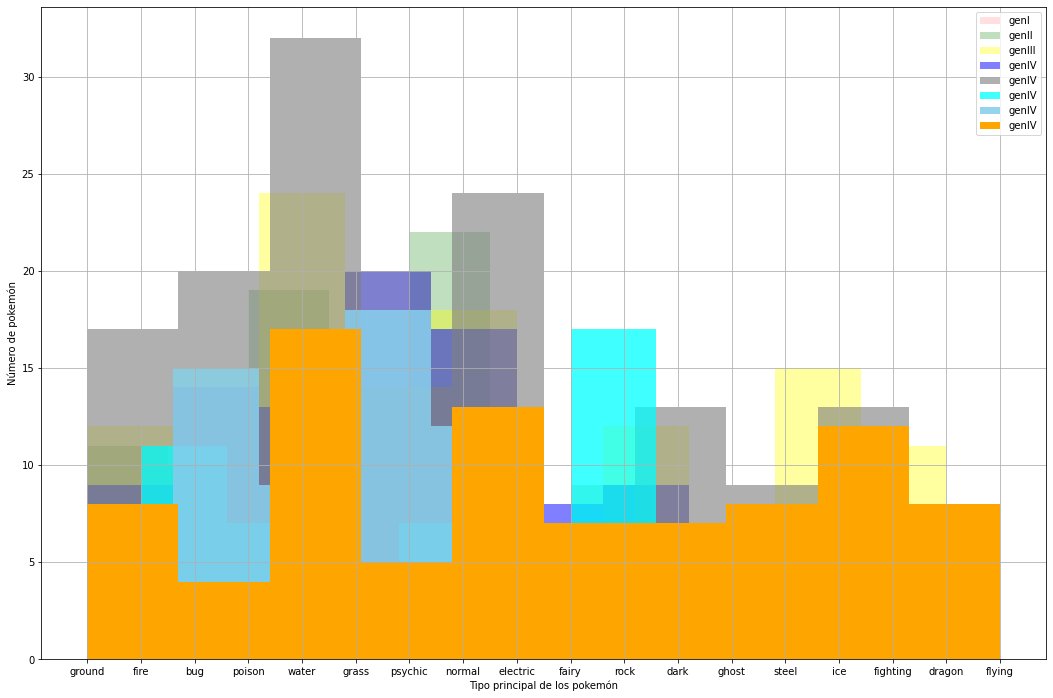

In [126]:
pokemoni['primary_type'].hist(alpha=0.125,label="genI", color="red", figsize=(18,12))
pokemonii['primary_type'].hist(alpha=0.250,label="genII", color="green")
pokemoniii['primary_type'].hist(alpha=0.375,label="genIII", color="yellow")
pokemoniv['primary_type'].hist(alpha=0.500,label="genIV", color="blue")
pokemonv['primary_type'].hist(alpha=0.625,label="genIV", color="gray")
pokemonvi['primary_type'].hist(alpha=0.750,label="genIV", color="cyan")
pokemonvii['primary_type'].hist(alpha=0.875,label="genIV", color="skyblue")
pokemonviii['primary_type'].hist(alpha=1,label="genIV", color="orange")




plt.legend()
plt.xlabel("Tipo principal de los pokemón")
plt.ylabel("Número de pokemón")

plt.savefig("Histograma1.jpg")

In [26]:
pokemon_legendaries = pokemon0[["gen", "is_legendary_0"]]
pokemon_legendaries

,gen,is_legendary_0
0,I,NO
1,I,NO
2,I,NO
3,I,NO
4,I,NO
...,...,...
893,VIII,NO
894,VIII,NO
895,VIII,NO
896,VIII,NO


In [27]:
pokemona = pokemon_legendaries[pokemon_legendaries["is_legendary_0"]=="YES"]
pokemona

,gen,is_legendary_0
149,I,YES
248,II,YES
249,II,YES
381,III,YES
382,III,YES
383,III,YES
482,IV,YES
483,IV,YES
486,IV,YES
642,V,YES


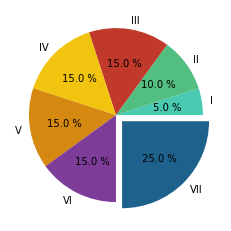

<Figure size 1080x1080 with 0 Axes>

In [28]:
gens = ["I","II","III","IV","V","VI","VII"]
legendaries = [1,2,3,3,3,3,5]
colors = ["#48C9B0","#52BE80","#C0392B","#F1C40F","#D68910","#7D3C98", "#1F618D"]
desfase = (0,0,0,0,0,0,0.1)
plt.pie(legendaries, labels=gens, autopct="%0.1f %%", colors=colors, explode=desfase)
plt.figure(figsize=(15,15))
plt.show()


In [29]:
pokemona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 149 to 799
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gen             20 non-null     object
 1   is_legendary_0  20 non-null     object
dtypes: object(2)
memory usage: 480.0+ bytes


In [30]:
#no encontraría forma de reportar esto como una gráfica pero sí como un tabla por así decirlo, aunque creo que con excel se entiende mejor con la gráfica de pastel...

In [31]:
pokemona.describe()


,gen,is_legendary_0
count,20,20
unique,7,1
top,VII,YES
freq,5,20


In [32]:
pokemon_legendaries.describe()

,gen,is_legendary_0
count,898,898
unique,8,2
top,V,NO
freq,156,878


In [33]:
xls=pd.ExcelFile('/content/sample_data/higi22.xlsx')
print(xls.sheet_names)

['all gens legendaries', 'legendaries per gen']


In [34]:
all_legendaries=xls.parse("all gens legendaries")
all_legendaries

,legendary,all gens
0,NO,878
1,YES,20
2,Total general,898


In [35]:
gen_legendaries=xls.parse('legendaries per gen')
gen_legendaries

,gen,legendaries
0,I,1
1,II,2
2,III,3
3,IV,3
4,V,3
5,VI,3
6,VII,5


In [36]:
print(gen_legendaries.to_latex(index=True))

\begin{tabular}{llr}
\toprule
{} &  gen &  legendaries \\
\midrule
0 &    I &            1 \\
1 &   II &            2 \\
2 &  III &            3 \\
3 &   IV &            3 \\
4 &    V &            3 \\
5 &   VI &            3 \\
6 &  VII &            5 \\
\bottomrule
\end{tabular}



In [37]:
print(all_legendaries.to_latex(index=True))

\begin{tabular}{llr}
\toprule
{} &      legendary &  all gens \\
\midrule
0 &             NO &       878 \\
1 &            YES &        20 \\
2 &  Total general &       898 \\
\bottomrule
\end{tabular}



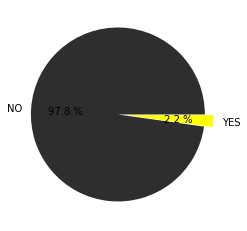

<Figure size 1080x1080 with 0 Axes>

In [38]:
legendary = ["NO","YES"]
all_gens= [878,20]
colors = ["#2E2E2E","#FFFF00"]
desfase = (0.1,0)
plt.pie(all_gens, labels=legendary, autopct="%0.1f %%", colors=colors, explode=desfase)
plt.figure(figsize=(15,15))
plt.show()
